In [1]:
# load face95 data
import numpy as np
from dataset import grey_loader, Faces

all_data_set = []    # data set
all_data_label = []  # label

root = './faces95'
trainset = Faces(root, loader=grey_loader)

for i, data in enumerate(trainset):
    img, label = data
    all_data_set.append(np.array(img))
    all_data_label.append(label)

print(len(all_data_set))
print(all_data_label[100])
data = np.array(all_data_set)
n, h, w=data.shape
data = np.reshape(data, (n, h*w))
print(data.shape)

1440
5
(1440, 36000)


In [5]:
# compute pricipal component
from pca import PCA
pca = PCA(n_component=32, solver='svd')
pca.fit(data)
print(pca._components.shape)
print(pca._component_values)

u: (1440, 1440) sigma: (1440,) v: (1440, 36000)
(36000, 32)
[8157005.14852956 5367031.62012496 3132934.92630283 2410081.96589861
 1469405.47302861 1291257.99488545  989347.56846251  739920.71071807
  691940.75765275  577159.10764642  529718.29212663  487961.93611258
  421710.45320609  407435.96937121  334107.57504068  319815.41412395
  302987.65386714  280829.37043033  275183.90083666  265243.50929067
  245586.92368387  237566.81014944  229090.51979642  219340.54183606
  203451.73242787  192484.98838527  187659.61189359  174781.64098298
  165694.65485495  160362.39348272  154230.28491018  146494.81083575]


In [6]:
# reduce dimensionality
low_data = pca.transform(data)
print(low_data.shape)

(1440, 32)


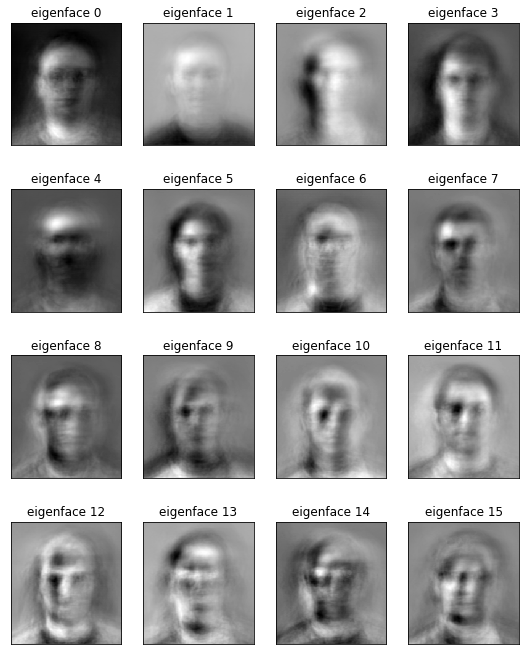

In [9]:
# visualize eigen faces
from matplotlib import pyplot as plt
def plot_gallery(images, titles, h, w, n_row=4, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

eigenfaces=pca._components.transpose(1,0).reshape(32, h, w)
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()